### This script contains the following:

#### 1. Importing libraries and data and cleaning
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() # For standardizing features.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r"C:\Users\maple\OneDrive\Desktop\CareerFoundry\Open Source Project"

In [4]:
# Import data

df = pd.read_csv(os.path.join(path,'Data','Prepared Data', 'spotify_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,song_id,rank,artist_names,number_of_artists,artist_individual,artist_genre,collab,track_name,release_date,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
0,0,0,1,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Plan A,2022-03-23,...,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203,Argentina,South America,Spanish
1,1,1,2,WOS,1,WOS,argentine indie,False,ARRANCARMELO,2022-04-06,...,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547,Argentina,South America,Spanish
2,2,2,3,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Chance,2022-04-06,...,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003,Argentina,South America,Spanish
3,3,3,5,Cris Mj,1,Cris Mj,urbano chileno,False,Una Noche en Medellín,2022-01-21,...,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750,Argentina,South America,Spanish
4,4,4,6,Emilia,1,Emilia,pop argentino,False,cuatro veinte,2022-03-24,...,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895,Argentina,South America,Spanish


In [7]:
# Dropping categorical variables 
df_2 = df.drop(columns=['Unnamed: 0','artist_names','collab','record_label','artist_individual','artist_genre','track_name','country','region','language','release_date','week'])

In [8]:
df_2.head()

,song_id,rank,number_of_artists,number_of_album_tracks,peak_rank,previous_rank,weeks_on_chart,weekly_streams,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0,1,1,1,1,1.0,4,3003411,0.583,0.834,0,1,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203
1,1,2,1,1,2,129.0,2,2512175,0.654,0.354,5,1,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547
2,2,3,1,2,3,59.0,2,2408983,0.721,0.463,1,0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003
3,3,5,1,1,5,5.0,8,2080139,0.870,0.548,10,0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750
4,4,6,1,1,6,9.0,3,1923270,0.761,0.696,7,0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895


In [9]:
# Replacing null values in dataframe in order to calculate variation score
df_2.fillna(0, inplace=True)

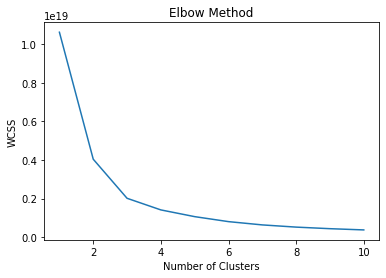

In [10]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df_2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

#### I chose to use 3 clusters based on the graph above. The line starts to flatten around 3 on the x-axis, creating the elbow, and there is only a slight decline from 3 to 4 indicating that the difference in rate of variation is minimal after 3 clusters. 













# 3. K-means clustering

In [11]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_2)

In [12]:
# instantiating model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [13]:
# Fit the k-means object to the data.
kmeans.fit(df_std)

KMeans(n_clusters=3, random_state=0)

In [14]:
y_kmeans = kmeans.fit_predict(df_std)

In [15]:
# predictions 
y_kmeans

array([0, 0, 1, ..., 2, 2, 2])

In [16]:
# converting predictions into a df

y_kmeans_df = pd.DataFrame(data = y_kmeans, dtype=int)
y_kmeans_df.columns = ['clusters']

In [17]:
y_kmeans_df

,clusters
0,0
1,0
2,1
3,1
4,1
...,...
1787526,2
1787527,2
1787528,2
1787529,2


In [18]:
# concatenating the cluster column to the dataframe

df_2 = pd.concat([df_2, y_kmeans_df], axis=1)

In [19]:
# checking the dataframe
print(df_2.shape)
df_2.head()

(1787531, 21)


,song_id,rank,number_of_artists,number_of_album_tracks,peak_rank,previous_rank,weeks_on_chart,weekly_streams,danceability,energy,...,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,clusters
0,0,1,1,1,1,1.0,4,3003411,0.583,0.834,...,1,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203,0
1,1,2,1,1,2,129.0,2,2512175,0.654,0.354,...,1,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547,0
2,2,3,1,2,3,59.0,2,2408983,0.721,0.463,...,0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003,1
3,3,5,1,1,5,5.0,8,2080139,0.870,0.548,...,0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750,1
4,4,6,1,1,6,9.0,3,1923270,0.761,0.696,...,0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895,1


In [20]:
df_2['clusters'].value_counts()

1    801778
2    494558
0    491195
Name: clusters, dtype: int64

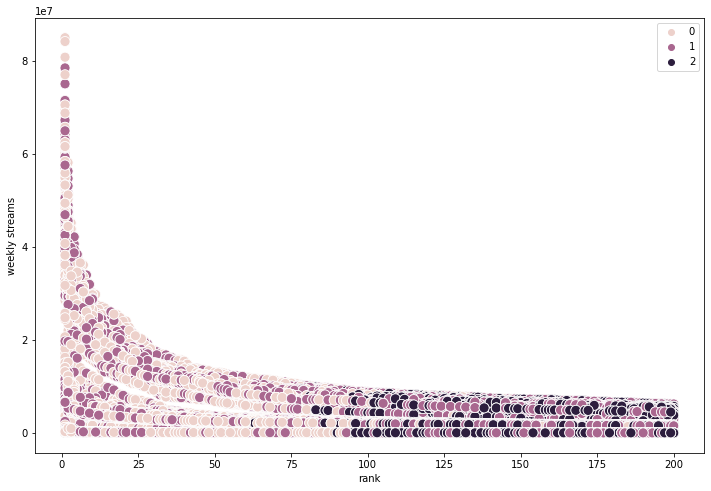

In [33]:
# Plot the clusters for the "rent" and "weekly streams" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rank'], y=df['weekly_streams'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rank') # Label x-axis.
plt.ylabel('weekly streams') # Label y-axis.
plt.show()

C:\Users\maple\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


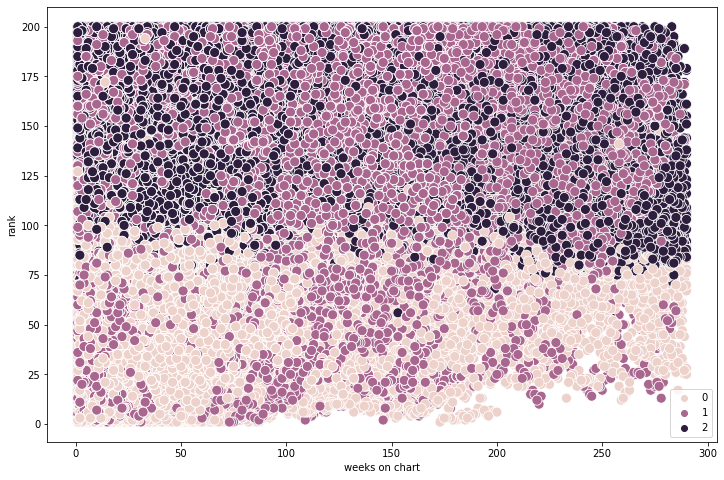

In [22]:
# Plot the clusters for the "rank" and "weeks_on_chart" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['weeks_on_chart'], y=df['rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('weeks on chart') 
plt.ylabel('rank') 
plt.show()

C:\Users\maple\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


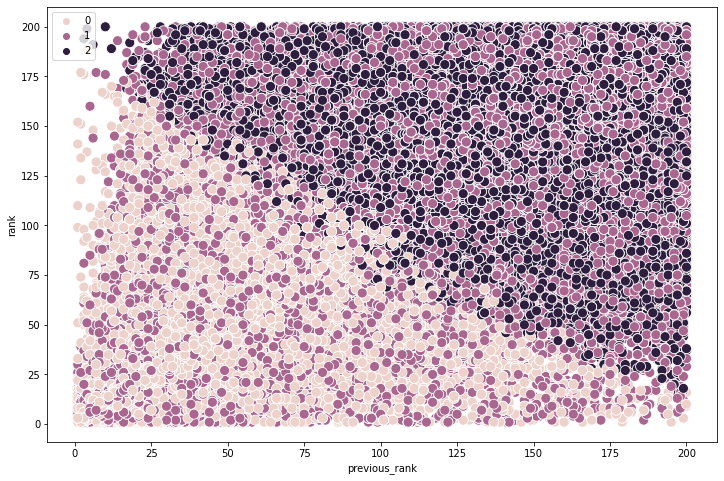

In [23]:
# Plot the clusters for the "rank" and "previous_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['previous_rank'], y=df['rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('previous_rank') 
plt.ylabel('rank') 
plt.show()

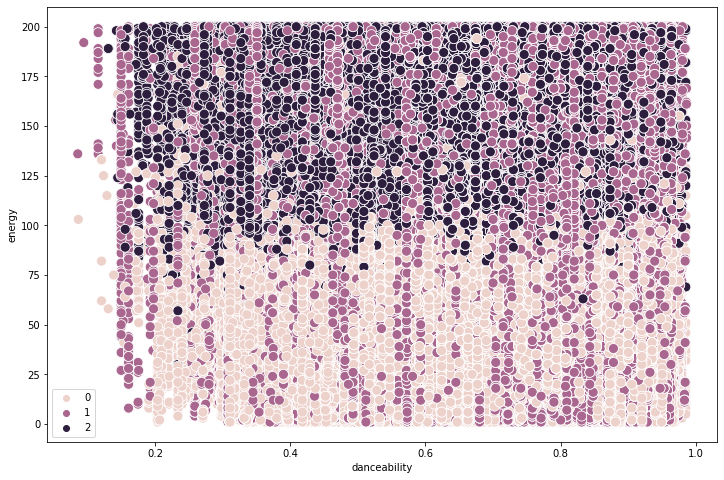

In [24]:
# Plot the clusters for the "rank" and "danceability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['danceability'], y=df['rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('danceability') 
plt.ylabel('energy') 
plt.show()

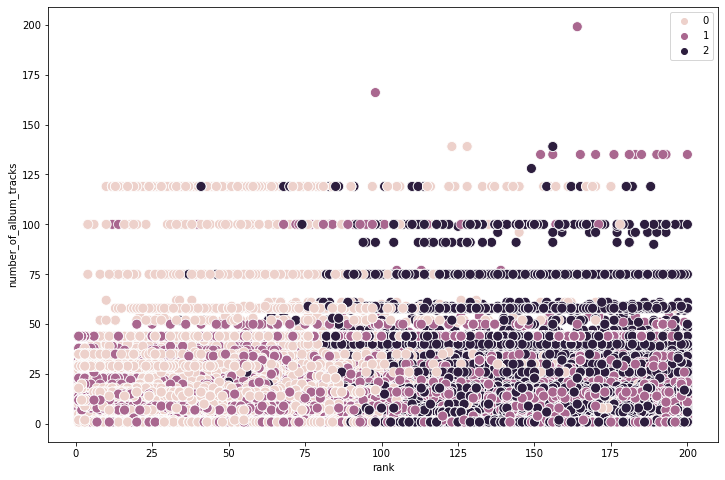

In [25]:
# Plot the clusters for the "rank" and "number_of_album_tracks" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rank'], y=df['number_of_album_tracks'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('rank') 
plt.ylabel('number_of_album_tracks') 
plt.show()

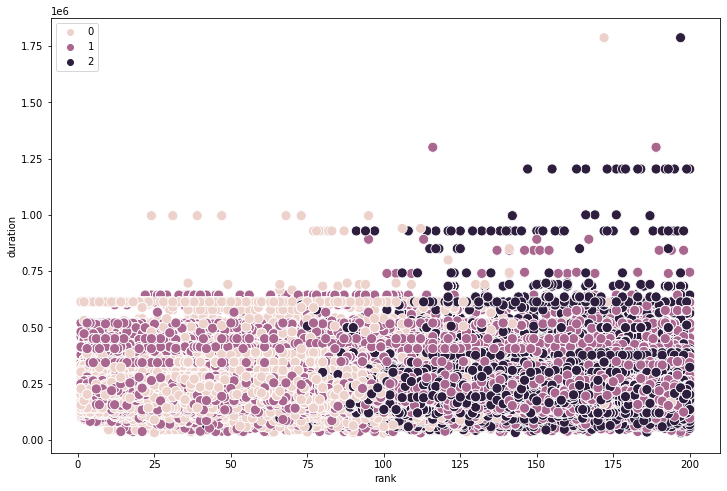

In [26]:
# Plot the clusters for the "rank" and "duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rank'], y=df['duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('rank') 
plt.ylabel('duration') 
plt.show()

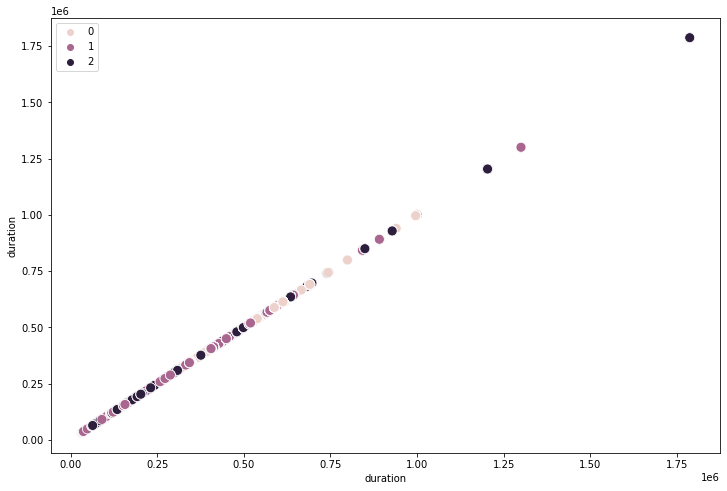

In [27]:
# Plot the clusters for the "duration" variable.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['duration'], y=df['duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('duration') 
plt.ylabel('duration') 
plt.show()

In [37]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
pd.set_option('display.max_columns', None)
df_2.groupby('cluster').agg({'rank':['mean', 'median'], 
                         'peak_rank':['mean', 'median'],
                         'previous_rank':['mean', 'median'], 
                         'number_of_artists':['mean', 'median'], 
                         'number_of_album_tracks':['mean', 'median'],
                         'weekly_streams':['mean', 'median'],
                         'weeks_on_chart':['mean', 'median'],
                         'danceability':['mean', 'median'],
                         'energy':['mean', 'median'],
                         'key':['mean', 'median'],
                         'mode':['mean', 'median'],    
                         'loudness':['mean', 'median'],
                         'speechiness':['mean', 'median'],
                         'acousticness':['mean', 'median'],
                         'instrumentalness':['mean', 'median'],
                         'liveness':['mean', 'median'],
                         'valence':['mean', 'median'],
                         'tempo':['mean', 'median'],
                         'duration':['mean', 'median']})

rank         peak_rank        previous_rank         \
                   mean median       mean median          mean median   
cluster                                                                 
dark purple  147.652864  149.0  60.373157   49.0    127.501684  134.0   
pink          52.579031   50.0  22.542033   12.0     41.894624   41.0   
purple        97.589431   96.0  38.293706   19.0     82.082175   78.0   

            number_of_artists        number_of_album_tracks         \
                         mean median                   mean median   
cluster                                                              
dark purple          2.088742    2.0               9.238235   10.0   
pink                 2.139894    2.0               8.001952    2.0   
purple               2.404583    2.0               8.272597    6.0   

            weekly_streams          weeks_on_chart        danceability         \
                      mean   median           mean median         mean median   
cluster                                                                         
dark purple  424339.632282  45596.0      46.503031   29.0     0.676946  0.689   
pink         965373.786698  99610.0      27.725254   16.0     0.692428  0.713   
purple       702015.584258  63474.0      33.015164   19.0     0.714879  0.734   

               energy              key        mode         loudness         \
                 mean median      mean median mean median      mean median   
cluster                                                                      
dark purple  0.651332  0.669  4.941839    5.0  1.0    1.0 -6.139073 -5.693   
pink         0.655158  0.674  4.616061    5.0  1.0    1.0 -6.054051 -5.679   
purple       0.659681  0.674  5.880775    6.0  0.0    0.0 -6.271537 -5.980   

            speechiness         acousticness        instrumentalness         \
                   mean  median         mean median             mean median   
cluster                                                                       
dark purple    0.105227  0.0599     0.257943  0.179         0.011169    0.0   
pink           0.106321  0.0655     0.251857  0.182         0.008362    0.0   
purple         0.125131  0.0809     0.249695  0.180         0.009005    0.0   

             liveness          valence              tempo           \
                 mean median      mean median        mean   median   
cluster                                                              
dark purple  0.171787  0.120  0.545676  0.555  122.074402  119.976   
pink         0.168499  0.115  0.555721  0.559  122.756684  119.997   
purple       0.168433  0.118  0.555946  0.561  121.472997  118.199   

                  duration            
                      mean    median  
cluster                               
dark purple  215329.158681  207732.0  
pink         208187.500461  200040.0  
purple       211250.377633  201107.0

#### The clusters make sense as they appear to be defined largely by rank and popularity. The pink cluster includes songs with the best ranks, the dark purple cluster are songs with the worst ranks, with the purple cluster in between. The clusters are also largely divided by peak rank and previous rank, and weekly streams in the same manner. There are no significant differences in number of artists, album tracks, or any of the song attribute scores. The dark purple cluster includes songs with the longest durations, while pink have the shortest durations. The dark purple cluster also has the highest weeks on chart while pink has the lowest. 

#### The results of this unsupervised learning are useful for developing new hypothesis and predicting variables based the charactistics of the clusters created. For example, as clusters show that songs can be grouped by rank and weekly streams, we can form the hypothesis, "If a song has more weekly streams, then its rank will be higher", and we can go back and create a regression model to predict the rank of a song based on its weekly streams.  We can also rule out the hypotheses that certain song attribute scores will result in better ranks as our descriptive statistics show that the attributes are the same across clusters. 

In [36]:
#Exporting cleaned dataframe to “Prepared Data” folder.
df_2.to_csv(os.path.join(path, 'Data','Prepared Data', 'spotify_clean_clusters.csv'))